# CNV-seq Analysis

This script and helper functions implements an R-only version of
the work flow from https://github.com/hliang/cnv-seq. It uses
GenomicRanges utilities to perform read counts across bins, and the
`cnv` package available at the URL above for additional
analysis. No intermediate files are generates.

This R script has been converted into a jupyter notebook from Bioconductor's RNCV_seq.R code from their copy-number-analysis repository https://github.com/Bioconductor/copy-number-analysis/wiki/CNV-seq.

## <span style="color:red">User Input (MANDATORY)</span>

---
<span style="color:red">**NOTE: Config File**</span>

     Run the cell below once the config-CNVseq.yml file has been edited accordingly.

---

In [1]:
configPath <- "config/example2-config-CNVseq-sorghum.yml"

---
<span style="color:red">**NOTE: Plot Y-Limits**</span>

     It is recommended to inspect the CNV-plots with default y-limits and then modify.
     Defaults:
         yAllMax <-  5
         yAllMin <- -5
         yChrMax <-  5
         yChrMin <- -5

---

In [2]:
yAllMax <-  5
yAllMin <- -5
yChrMax <-  5
yChrMin <- -5

## Installing Required Libraries (run only once)

There are currently two options to install necessary packages: using R or conda. The installation needs to be run the first time the tool is used. Once the installation has run, there is no need for re-installation as the necessary packages will be already installed in the working environment.

### OPTION 1 - Using R 

In [ ]:
# install necessary libraries using R functions
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install(c("GenomicAlignments"))
install.packages("configr")
install.packages("ggplot2")

### OPTION 2 - Using conda

In [ ]:
# install 
system("conda install -y -c conda-forge r-biocmanager -y", intern=TRUE)
system("conda install -y -c bioconda bioconductor-genomicalignments", intern=TRUE)
system("conda install -y -c pcgr r-configr", intern=TRUE)
system("conda install -y -c r r-ggplot2", intern=TRUE)

## Loading Required Libraries

In [3]:
# load necessary libraries
library(GenomicAlignments)
library(ggplot2)
library(configr)

# specify source R script with helper functions
source("helper-functions/RCNV_seq-helper.R")
source("helper-functions/cnvHLiang.R")

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The

## CNV Calculations and Plotting


Comparison: comparison_1
Comparing samples:
/home/anibal/bam_files/sorghum/1con_sample_all-chroms.bam 
vs.
 /home/anibal/bam_files/sorghum/1D2_sample_all-chroms.bam 

[1] "chromosome:  Chr07"
[1] "chromosome:  Chr08"
[1] "chromosome:  Chr09"
[1] "cnv_id:  1  of  31"
[1] "cnv_id:  2  of  31"
[1] "cnv_id:  3  of  31"
[1] "cnv_id:  4  of  31"
[1] "cnv_id:  5  of  31"
[1] "cnv_id:  6  of  31"
[1] "cnv_id:  7  of  31"
[1] "cnv_id:  8  of  31"
[1] "cnv_id:  9  of  31"
[1] "cnv_id:  10  of  31"
[1] "cnv_id:  11  of  31"
[1] "cnv_id:  12  of  31"
[1] "cnv_id:  13  of  31"
[1] "cnv_id:  14  of  31"
[1] "cnv_id:  15  of  31"
[1] "cnv_id:  16  of  31"
[1] "cnv_id:  17  of  31"
[1] "cnv_id:  18  of  31"
[1] "cnv_id:  19  of  31"
[1] "cnv_id:  20  of  31"
[1] "cnv_id:  21  of  31"
[1] "cnv_id:  22  of  31"
[1] "cnv_id:  23  of  31"
[1] "cnv_id:  24  of  31"
[1] "cnv_id:  25  of  31"
[1] "cnv_id:  26  of  31"
[1] "cnv_id:  27  of  31"
[1] "cnv_id:  28  of  31"
[1] "cnv_id:  29  of  31"
[1] "cnv_id:

Warning message in plot.cnv.all(cnv, title = "Copy Number Variants - All", ylim = c(yAllMin, :
“missed some data points due to small ylim range”
Warning message:
“Removed 1928 rows containing missing values (geom_point).”
Warning message:
“Removed 1928 rows containing missing values (geom_point).”
Warning message in plot.cnv.chr(cnv, chromosome = chrom, ylim = c(yChrMin, yChrMax)):
“missed some data points due to small ylim range”
Warning message in plot.cnv.chr(cnv, chromosome = chrom, ylim = c(yChrMin, yChrMax)):
“missed some data points due to small ylim range”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


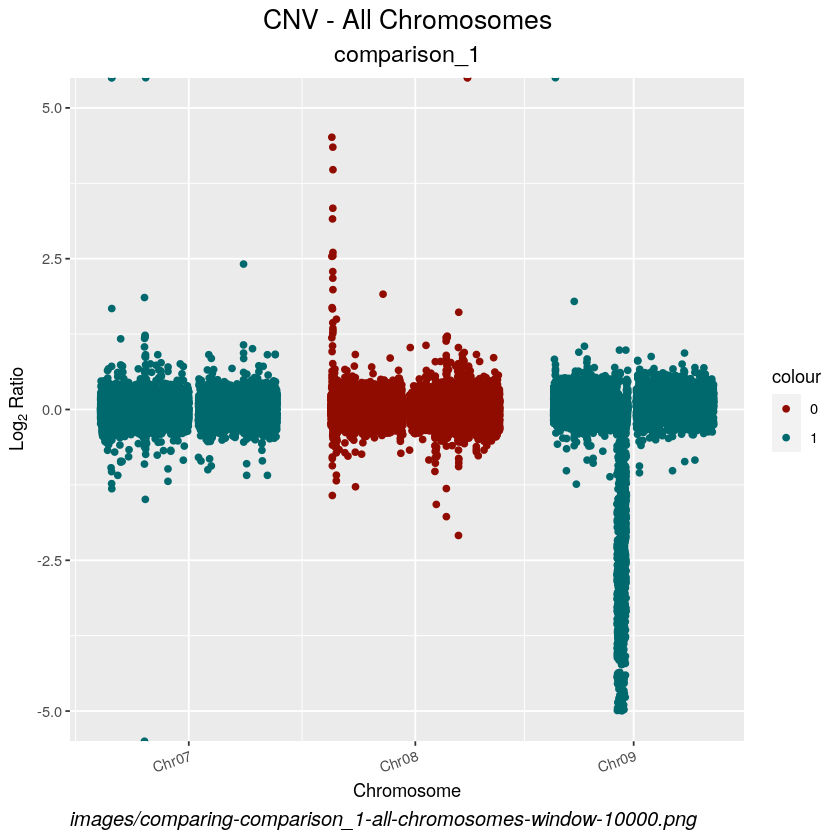

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message in plot.cnv.chr(cnv, chromosome = chrom, ylim = c(yChrMin, yChrMax)):
“missed some data points due to small ylim range”
Warning message:
“Removed 31 rows containing missing values (geom_point).”


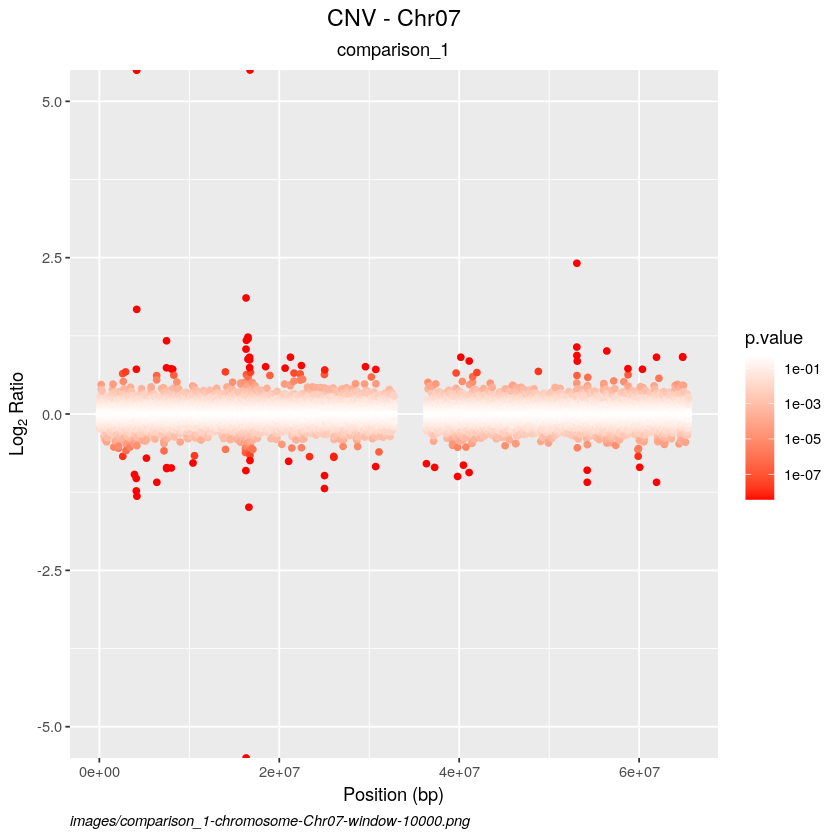

Warning message:
“Removed 31 rows containing missing values (geom_point).”


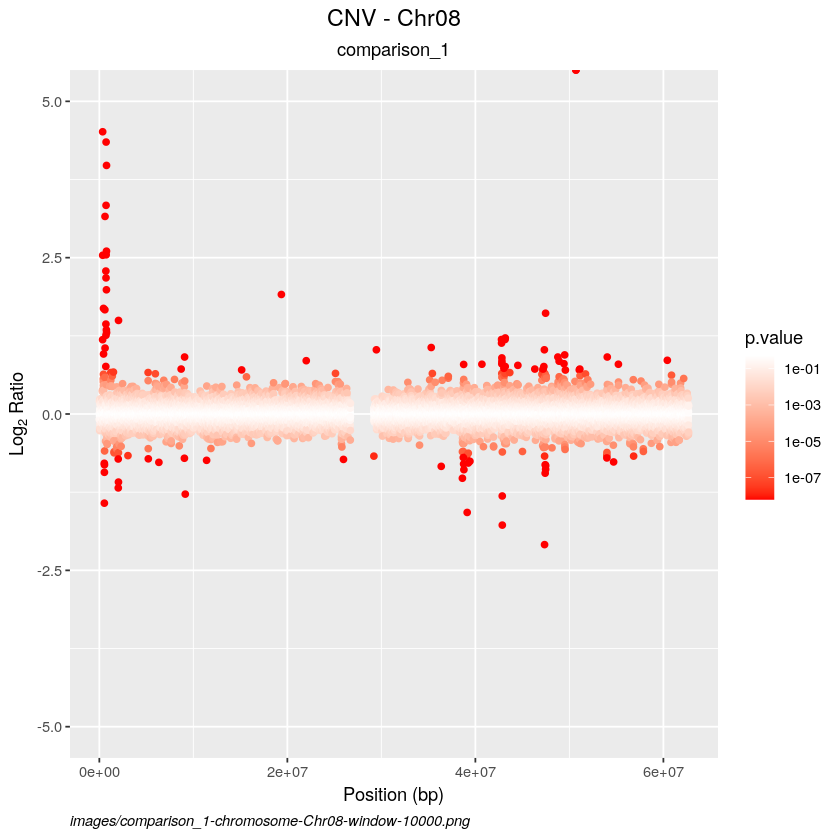

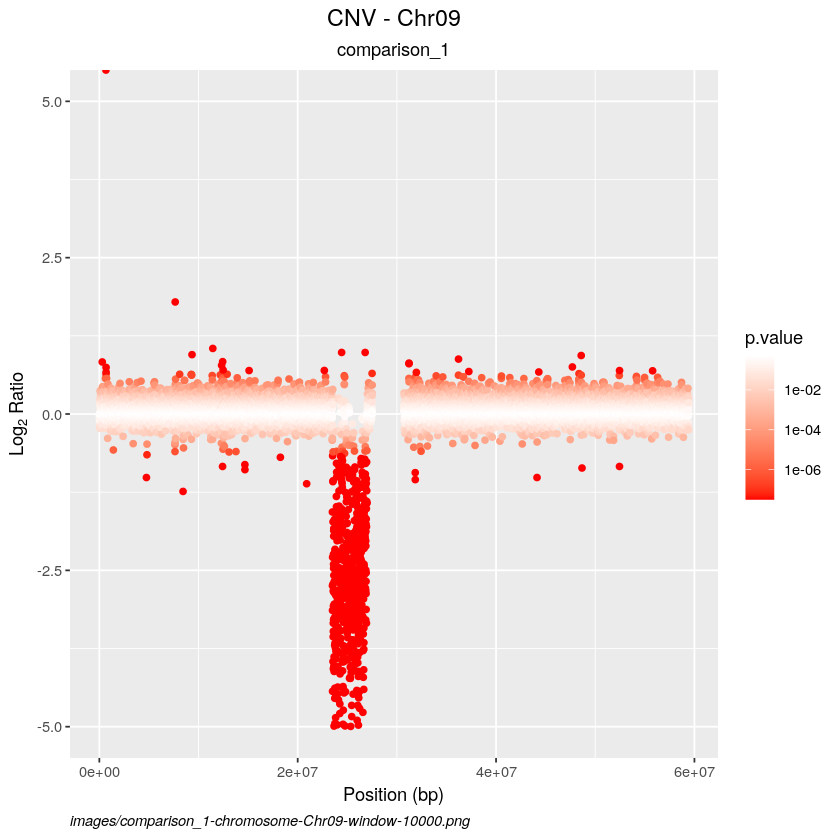

In [5]:
# extract config file fields and values
config <- read.config(configPath)

# store comparisons to be done
comparisons <- config$comparisons
comparisonNames <- names(config$comparisons)

# store chromosomes to subset
chromosomes <- unlist(strsplit(gsub(" ", "", config$chromosomes), ","))

# store provided parameters
parameters <- config$parameters
parameterNames <- names(config$parameters)

# first check if parameter exists. if exist, store value,
# if not exist, use default values
if ('annotate' %in% parameterNames){
    annotate <- config$parameters$annotate
} else {annotate <- TRUE}
if ('bigger' %in% parameterNames){
    bigger <- config$parameters$bigger
} else {bigger <- 1.5}
if ('log2' %in% parameterNames){
    log2 <- config$parameters$log2
} else {log2 <- 0.6}
if ('pvalue' %in% parameterNames){
    pvalue <- config$parameters$pvalue
} else {pvalue <- 0.001}

# loop per comparisons 
for (comparison in comparisonNames){
    cat(paste("\nComparison:", comparison))
    cat(paste("\nComparing samples:\n"))
    
    # files to compare
    control <- config$comparisons[[comparison]]$control
    mutant <- config$comparisons[[comparison]]$mutant
    
    cat(paste(control, "\nvs.\n", mutant, "\n\n"))
    
    # name mutant as "test" and control as "ref"
    files <- file.path(c(mutant, control))
    names(files) <- c("test", "ref")
    
    # calculate overall captures/tiles and hits
    if ('bed_file' %in% parameterNames) { # if 'bed_file' object present in config
        # extract TRUE or FALSE value
        bed_file <- config$parameters$bed_file
        
        if (isTRUE(bed_file)) { # bed_file == TRUE
            # extract path to BED file
            bedPath <- config$bed_path
            
            # convert BED to dataframe df
            BEDdf <- read.table(bedPath, header=FALSE, sep="\t", stringsAsFactors=FALSE, quote="")
                        
            # split and convert per region
            captures <- toGRanges(BEDdf)
            hits <- summarizeOverlaps(captures, files, binCounter)
                        
        } else { # bed_file == FALSE, 
            bed_file <- FALSE
            
            # extract window_size or calculate if missing
            if ('window_size' %in% parameterNames){
                window_size <- config$parameters$window_size
            } else {
                window_size <- windowSize(files, pvalue=pvalue, log2=log2, bigger=bigger)
            }

            tiles <- tileGenomeOverlap(files, window_size)
            hits <- summarizeOverlaps(tiles, files, binCounter)
        }
    } else { # 'bed_file' object not present in config
        bed_file <- FALSE
        
        # extract window_size or calculate if missing
        if ('window_size' %in% parameterNames){
            window_size <- config$parameters$window_size
        } else {
            window_size <- windowSize(files, pvalue=pvalue, log2=log2, bigger=bigger)
        }

        tiles <- tileGenomeOverlap(files, window_size)
        hits <- summarizeOverlaps(tiles, files, binCounter)
    }
    
    # subset only those chromosomes defined in config file
    hitsChrSubset <- subset(hits, seqnames %in% chromosomes)
    
    # create tabulated file with dataframe
    if (bed_file) {
        hitsPath <- paste("tab-files/", comparison, "-all-hits-captures-BED.tab", sep="")
        hitsFile <- as.countsfile(hitsChrSubset, hitsPath)
    } else {
        hitsPath <- paste("tab-files/", comparison, "-window-", window_size, "-all-hits.tab", sep="")
        hitsFile <- as.countsfile(hitsChrSubset, hitsPath)
    }
    

    # calculate Copy Number Variations (CNVs)
    cnv <- cnv.cal(hitsFile, log2=log2, annotate=annotate)
    
    # print summary of CNVs per chromosome
    cat("\n")
    cnv.summary(cnv)
    
    # save all considered CNVs calculated by cnv.cal( ) function and print
    cnvFile <- paste("tab-files/", comparison, "-all-chroms-CNV.tab", sep="")
    cnv.print(cnv, file=cnvFile)
    cat("\n")
    cnv.print(cnv)
    
    # path to save images in png format
    if (bed_file) {
        pngPath <- paste("images/", comparison, "-all-chromosomes-captures-BED.png", sep="")
        png(pngPath)
    } else {
        pngPath <- paste("images/", "comparing-", comparison, "-all-chromosomes-window-", window_size, ".png", sep="")
        png(pngPath)
    }
    
    # plot all chromosomes' CNVs
    plotAll <- plot.cnv.all(cnv, title="Copy Number Variants - All", ylim=c(yAllMin,yAllMax), colour=2)
    plotAll <- plotAll + labs(title="CNV - All Chromosomes", 
                              subtitle=comparison, caption=pngPath) +
                         theme(plot.title=element_text(hjust=0.5, size=16),
                               plot.subtitle=element_text(hjust=0.5, size=14), 
                               plot.caption=element_text(hjust=0, face="italic", size=12),
                               axis.text.x=element_text(angle=20, vjust=1, hjust=1))
    print(plotAll)
    
    # save and close pdf device  
    dev.off()
    
    # print figure to stdout
    print(plotAll)
    
    # loop per chromosomes
    for (chrom in chromosomes){
        # path to save images in png format
        if (bed_file) {
            pngPath <- paste("images/", comparison, "-chromosome-", chrom, "-captures-BED.png", sep="")
            png(pngPath)
        } else {
            pngPath <- paste("images/", comparison, "-chromosome-", chrom, "-window-", window_size, ".png", sep="")
            png(pngPath)
        }
        
        # plot chromosome CNV
        plotChr <- plot.cnv.chr(cnv, chromosome=chrom, ylim=c(yChrMin,yChrMax))
        plotChrTitle <- paste("CNV -", chrom)
        plotChr <- plotChr + labs(title=plotChrTitle, 
                                  subtitle=comparison, caption=pngPath) +
                             theme(plot.title=element_text(hjust=0.5, size=14),
                                   plot.subtitle=element_text(hjust=0.5), 
                                   plot.caption=element_text(hjust=0, face="italic"))
        print(plotChr)
        
        # save and close pdf device  
        dev.off()
        
        # print figure to stdout
        print(plotChr)
    }
}

## Plotting Specific Window of One Chromosome

---
<span style="color:red">**NOTE: Plotting a Chromosome Window**</span>

     The cell below prints a specific window of a specific chromosome. 
     The following parameters must be populated:

---

     
- `chromosome` - string of chromosome name; example: `"Chr09"`
- `from` - start of window in bp; both scientific notation is accepted: `100000` or `10e4`
- `to` - end of window in bp; the same applies as in `from` parameter
- `ylim` - y-axis bottom and upper limits; example: `ylim=c(-10, 10)`

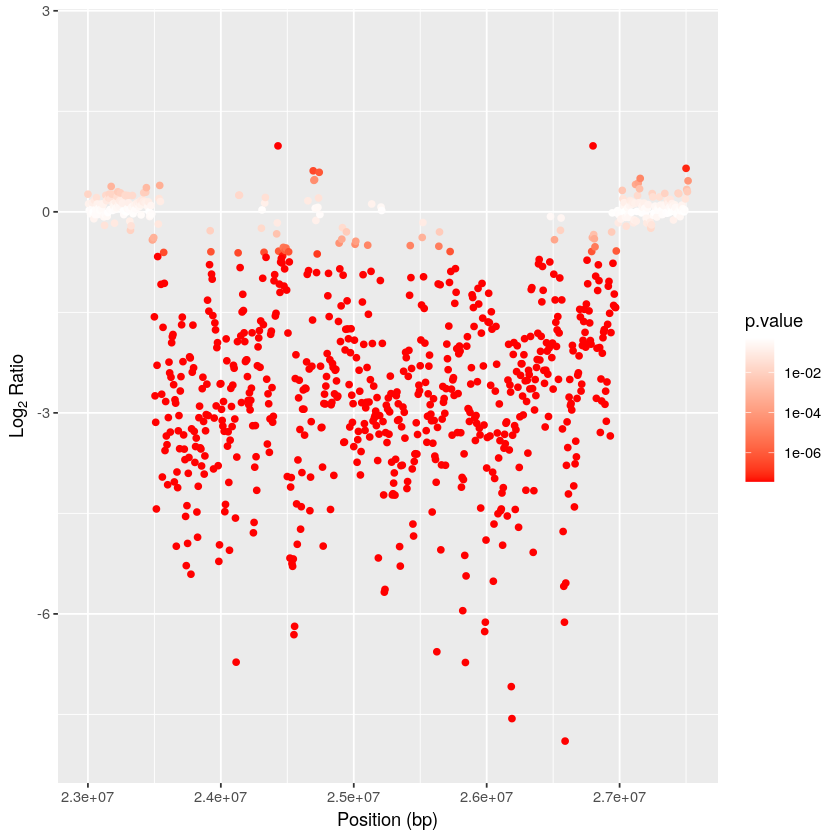

In [6]:
plot.cnv.chr(cnv, chromosome="Chr09", from=2.3e7, to=3e7, ylim=c(-8, 2.5))